<a href="https://colab.research.google.com/github/edmenciab733/qosf/blob/main/qosf_cohorte8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit_optimization
!pip install tweedledum

In [ ]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.minimum_eigensolvers import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

## Ejercicio 1

Given a positive integer and an list of prime numbers, look for the two prime numbers, that sum the positive number. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case.





### Explicación de la propuesta

Con respecto a mi propuesta, consiste en implementar un algoritmo de optimización para maximizar la suma de el conjunto de valores. Para encontrar el valor objetivo y cumplir con el requisito del problema hemos asumido restricciones.

 * Se definen dos restricciones lineales. La primera asegura que la suma de los valores seleccionados sea igual al valor objetivo (target). La segunda restricción asegura que exactamente dos elementos sean seleccionados.
 * Finalmente, la función retorna las variables de decisión óptimas (result.x), el estado del resultado (result.status.name), y el ansatz utilizado por QAOA (qaoa.ansatz).

In [ ]:
def find_the_primes_numbers(target, valores):
    # Crear un programa cuadrático
    qp = QuadraticProgram()

    # Añadir variables binarias para cada valor
    for i in range(len(valores)):
        qp.binary_var(f'x{i}')

    # Definir la función objetivo para maximizar la suma de los valores seleccionados
    linear_coef = {f'x{i}': valores[i] for i in range(len(valores))}
    qp.maximize(linear=linear_coef)
    qp.linear_constraint(linear=linear_coef, sense='EQ', rhs=target, name='sumatoria_restriccion')

    select_exactly_2 = {f'x{i}': 1 for i in range(len(valores))}
    qp.linear_constraint(linear=select_exactly_2, sense='EQ', rhs=2, name='select_exactly_2')


    # Crear una instancia de QAOA
    qaoa = QAOA(sampler=Sampler() ,optimizer=COBYLA())

    # Crear una instancia de MinimumEigenOptimizer utilizando QAOA
    optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

    # Resolver el problema de optimización
    result = optimizer.solve(qp)
    # Mostrar la solución
    return result.x, result.status.name, qaoa.ansatz


In [ ]:
valores = [1,3,5,7,11,13,15, 17]
target = int(input("Ingrese el valor objetivo: "))
x, resultado, circ = find_the_primes_numbers(target, valores)

Ingrese el valor objetivo: 17


In [ ]:
print("La solución es: {}".format(resultado))
valores_seleccionados = [valores[i] for i, valor in enumerate(x) if valor == 1]
if(len(valores_seleccionados) > 0):
    print("La valores que cumplen la condición son: {}".format(valores_seleccionados))

La solución es: INFEASIBLE
La valores que cumplen la condición son: [1, 3, 5, 7, 11, 13, 15, 17]


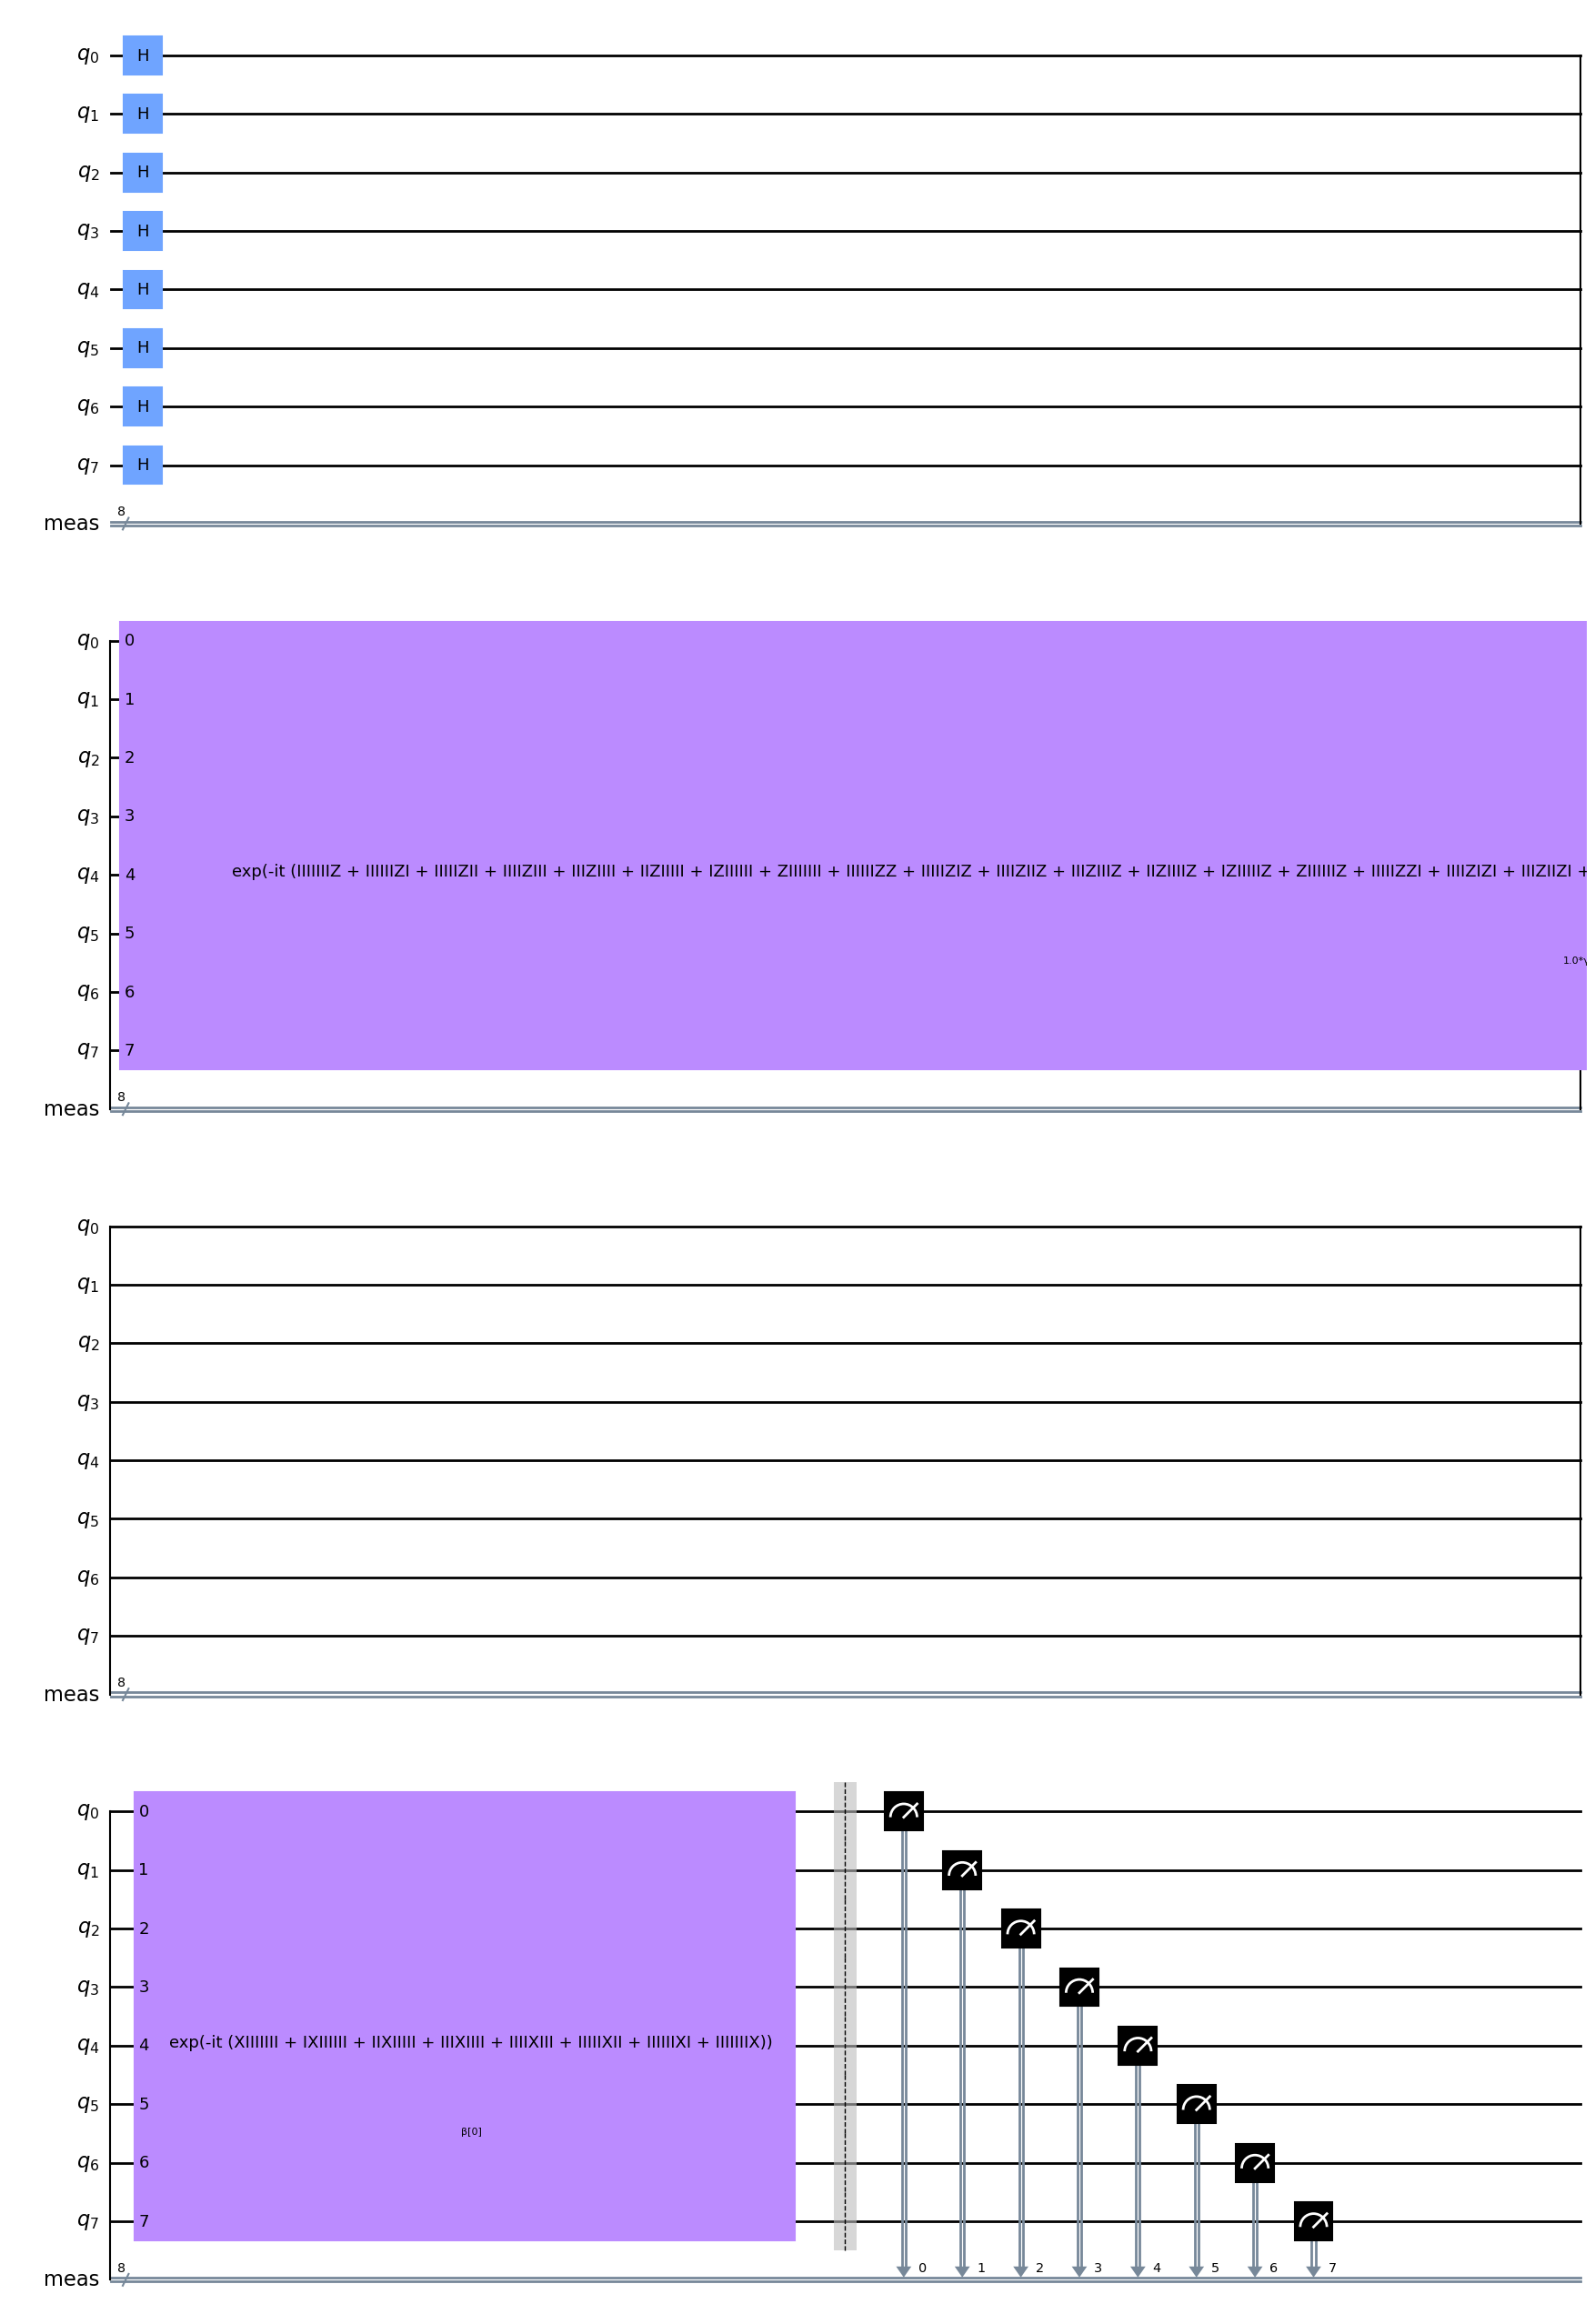

In [ ]:
circ.draw("mpl")

## Ejericio 2

Given a list of integer numbers, look for a negative number in the list. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case

### Explicación de la propuesta

En este caso, la propuesta está vinculada a convertir los números a complemento a dos, y luego separar los bits más significativos (el primer bit de cada número, recordando que si es 1 el número es negativo, de lo contrario, es positivo). Por último, la propuesta es similar a la anterior: maximizar el valor, con la única restricción de que si la suma de todos los valores es mayor o igual a 1, significa que al menos uno de los números es negativo. También se utiliza la función calcular_bits para adaptar cualquier valor

In [ ]:
def calcular_bits(numeros):
    """Calcula el número de bits necesario para representar todos los números en la lista."""
    max_valor = max(abs(n) for n in numeros)
    bits = 0
    while max_valor:
        bits += 1
        max_valor >>= 1
    return bits + 1  # Añadir un bit adicional para el bit de signo

def a_complemento_a_dos(n, bits):
    """Convierte un número decimal a su representación en complemento a dos."""
    if n < 0:
        return bin((1 << bits) + n)[-bits:]  # Usar el slicing para asegurar la longitud correcta
    else:
        return bin(n)[2:].zfill(bits)

In [ ]:
def find_negative_numbers(valores):
    # Crear un programa cuadrático
    qp = QuadraticProgram()

    # Añadir variables binarias para cada valor
    for i in range(len(valores)):
        qp.binary_var(f'x{i}')

    # Definir la función objetivo para maximizar la suma de los valores seleccionados
    linear_coef = {f'x{i}': valores[i] for i in range(len(valores))}
    qp.maximize(linear=linear_coef)
    qp.linear_constraint(linear=linear_coef, sense='GE', rhs=1, name='sumatoria_restriccion')

    # Crear una instancia de QAOA
    qaoa = QAOA(sampler=Sampler() ,optimizer=COBYLA())

    # Crear una instancia de MinimumEigenOptimizer utilizando QAOA
    optimizer = MinimumEigenOptimizer(min_eigen_solver=qaoa)

    # Resolver el problema de optimización
    result = optimizer.solve(qp)
    # Mostrar la solución
    if result.status.name == "SUCCESS":
        return  True, qaoa.ansatz
    else:
         return  False, qaoa.ansatz


In [ ]:
numeros = [3, -7]
bits = calcular_bits(numeros)
binarios = [a_complemento_a_dos(n, bits) for n in numeros]
valores = [int(elemento[0])for elemento in binarios]
resultado, circ = find_negative_numbers(valores)

In [ ]:
print("La lista contiene al menos un negativo: {}".format(resultado))

La lista contiene al menos un negativo: True
